# Final Project Heart Attack Classification by PatternSeeker

## Import Library

In [647]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # langsung pilih satu algoritma klasifikasi saja
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Import Data

In [648]:
df = pd.read_csv('https://raw.githubusercontent.com/Pattern-Seeker/heart-attack-classification/refs/heads/main/heart_attack_prediction_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


# 1.&nbsp;EDA

### Check Data type

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [650]:
data_desc = (
    df
    .columns
    .to_series()
    .groupby(df.dtypes)
    .groups.items()
)

for dtype, columns in data_desc:
    print(f"{dtype}:")
    for col in columns:
        print(f"  - {col}")

int64:
  - Age
  - Cholesterol
  - Heart Rate
  - Diabetes
  - Family History
  - Smoking
  - Obesity
  - Alcohol Consumption
  - Previous Heart Problems
  - Medication Use
  - Stress Level
  - Income
  - Triglycerides
  - Physical Activity Days Per Week
  - Sleep Hours Per Day
  - Heart Attack Risk
float64:
  - Exercise Hours Per Week
  - Sedentary Hours Per Day
  - BMI
object:
  - Patient ID
  - Sex
  - Blood Pressure
  - Diet
  - Country
  - Continent
  - Hemisphere


In [651]:
df.shape #rows & columns

(8763, 26)

In [652]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [653]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### Check Null

In [654]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


### Check Duplicate

In [655]:
df.duplicated().sum()

np.int64(0)

### Feature Engineering

#### Blood Pressure splitting

In [656]:
df[["Systolic BP", "Diastolic BP"]] = (
    df["Blood Pressure"]
    .str.split("/", expand=True)
    .astype(int)
)
display(df)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


### Check Distribution data

In [657]:
pd.DataFrame({
    "dtype": df.dtypes,
    "unique_count": df.nunique()
}).sort_values(by="unique_count", ascending=True)


,dtype,unique_count
Sex,object,2
Family History,int64,2
Diabetes,int64,2
Medication Use,int64,2
Previous Heart Problems,int64,2
Alcohol Consumption,int64,2
Obesity,int64,2
Smoking,int64,2
Hemisphere,object,2
Heart Attack Risk,int64,2


#### Target Variable

In [658]:
df['Heart Attack Risk'].value_counts()

,count
Heart Attack Risk,
0,5624
1,3139


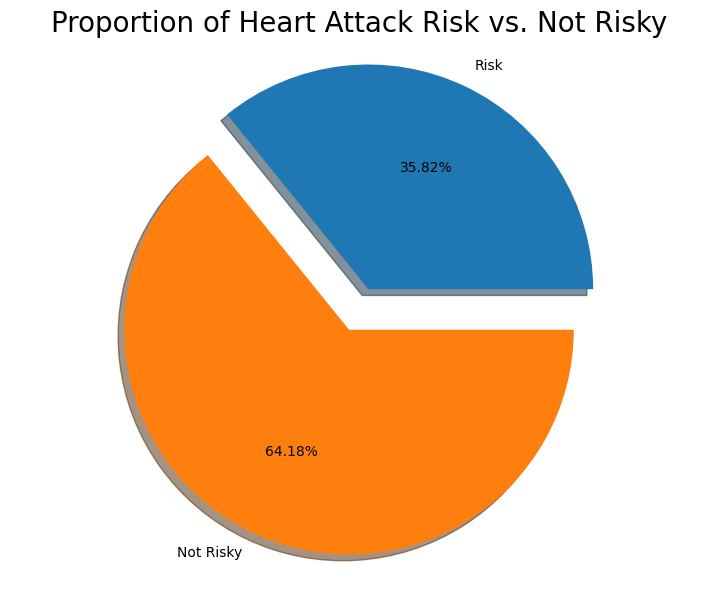

In [659]:
target_column = 'Heart Attack Risk'
labels = ['Risk', 'Not Risky']

sizes = [
    df[target_column][df[target_column]==1].count(), # Risk
    df[target_column][df[target_column]==0].count() # No Risk
]

explode = (0, 0.2)
fig, ax = plt.subplots(figsize=(9, 7))
ax.pie(
    x=sizes,
    explode=explode,
    labels=labels,
    autopct='%1.2f%%',
    shadow=True,
    startangle=0
)

ax.axis('equal')
plt.title("Proportion of Heart Attack Risk vs. Not Risky", size=20)
plt.show()

#### Numeric Features

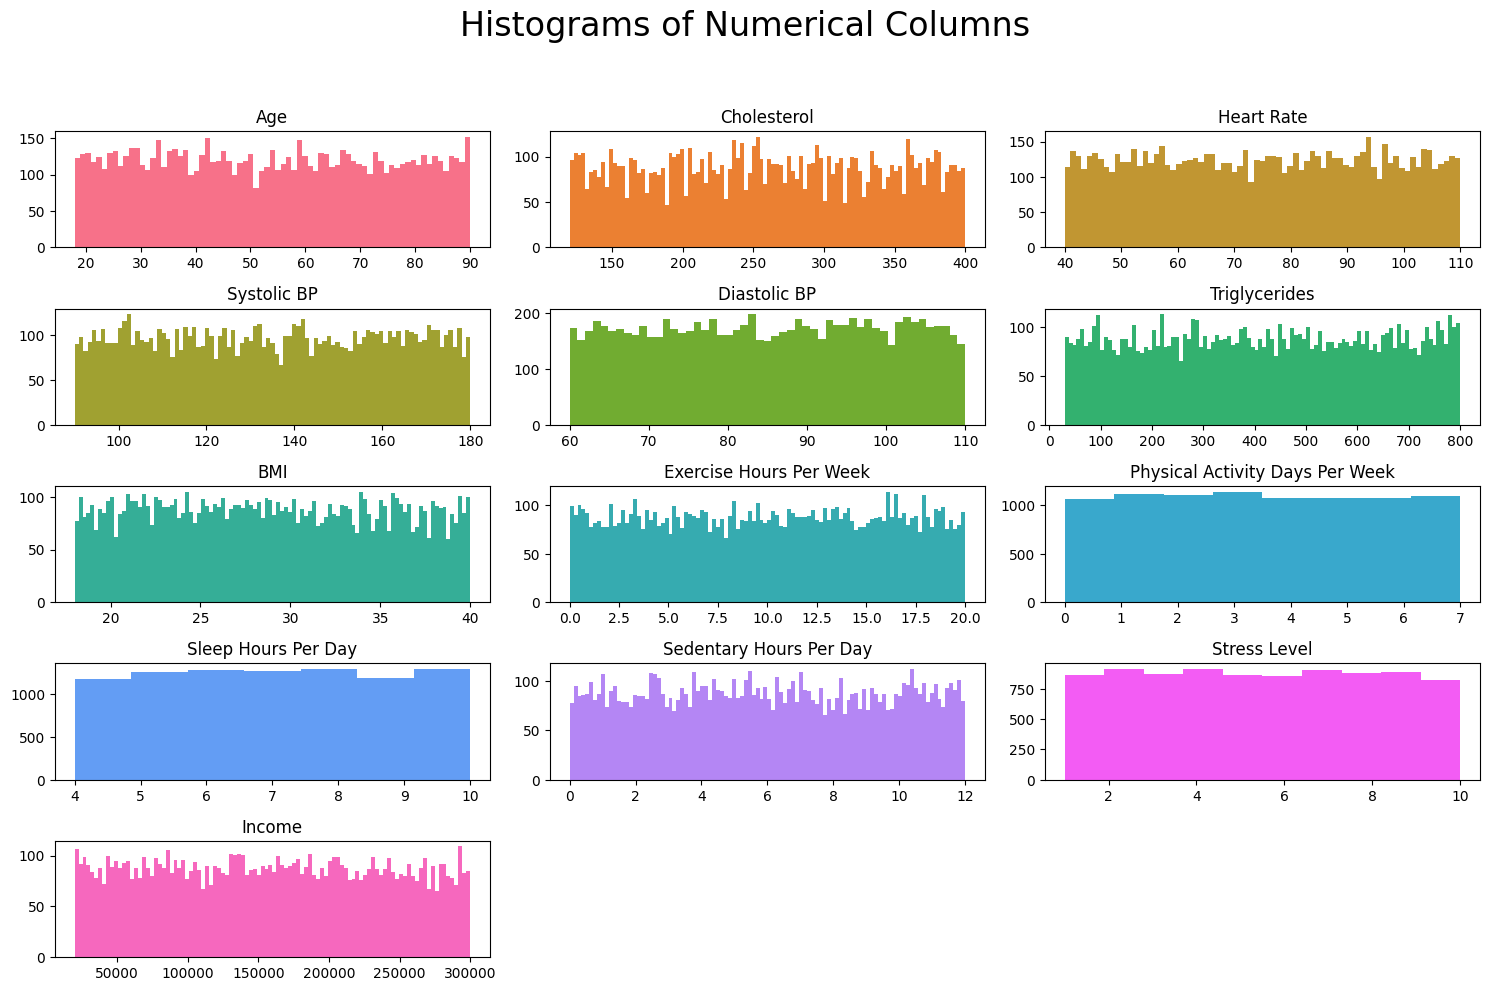

In [660]:
num_feature_cols = [
    'Age',
    'Cholesterol',
    'Heart Rate',
    'Systolic BP',
    'Diastolic BP',
    'Triglycerides',
    'BMI',
    'Exercise Hours Per Week',
    'Physical Activity Days Per Week',
    'Sleep Hours Per Day',
    'Sedentary Hours Per Day',
    'Stress Level',
    'Income'
]

df_num_features = df[num_feature_cols]
# Define a color palette with distinct colors
num_feature_cols_palette = sns.color_palette("husl", len(num_feature_cols))
# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i in range(df_num_features.shape[1]):
    plt.subplot(6, 3, i + 1 )
    f = plt.gca()
    f.set_title(df_num_features.columns.values[i])

    vals = np.size(df_num_features.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    # Use the color palette for each subplot
    plt.hist(
        df_num_features.iloc[:, i],
        bins=vals,
        color=num_feature_cols_palette[i]
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

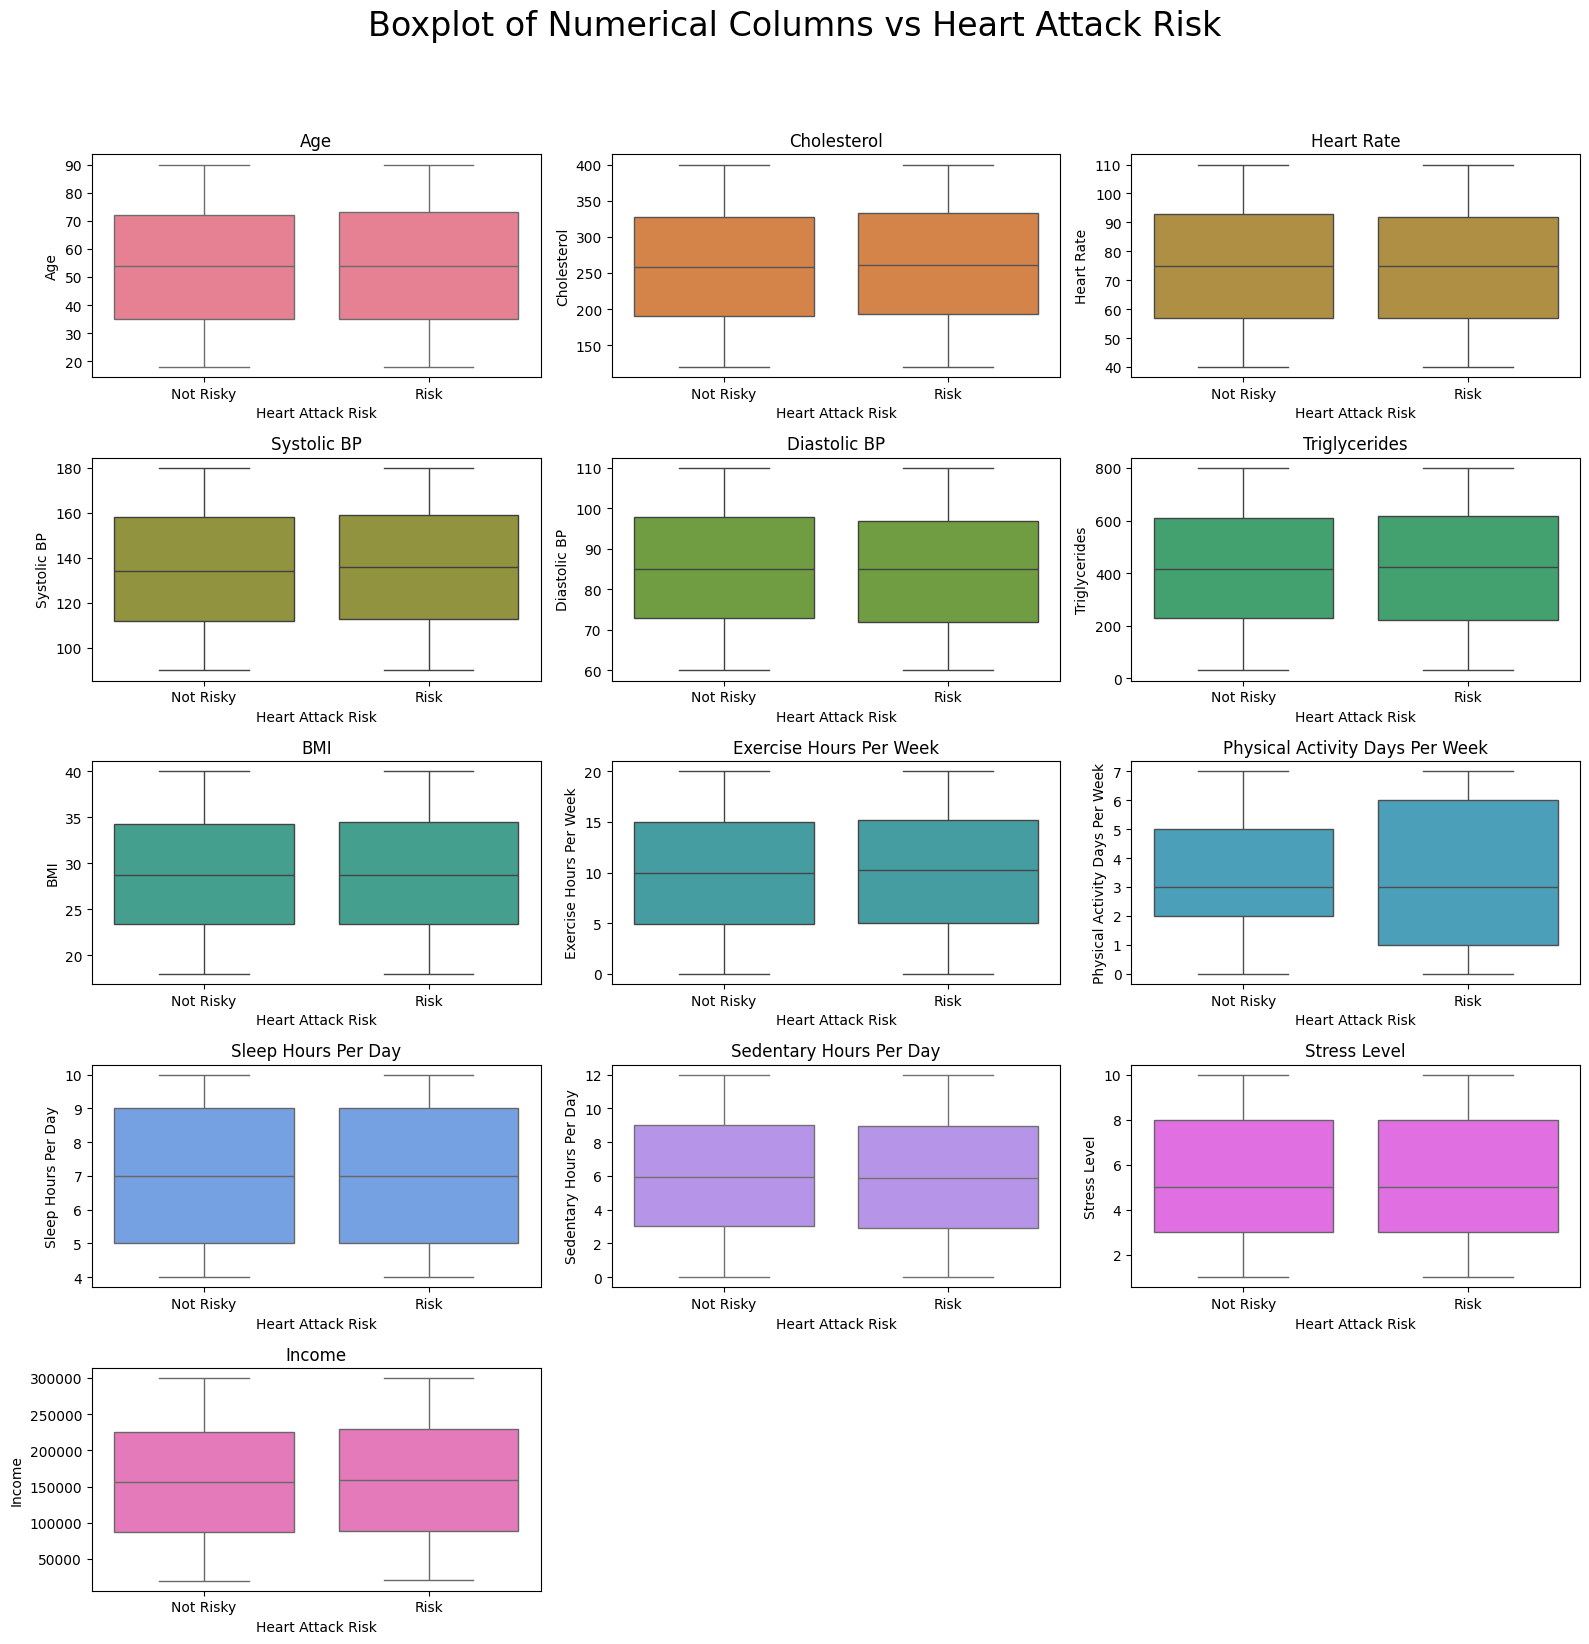

In [661]:
fig = plt.figure(figsize=(16, 20))
plt.suptitle(
    'Boxplot of Numerical Columns vs Heart Attack Risk',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i, col in enumerate(df_num_features.columns):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(col)

    sns.boxplot(
        x='Heart Attack Risk',
        y=col,
        data=df,
        ax=ax,
        color=num_feature_cols_palette[i]
    )

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Not Risky', 'Risk'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Binary Category Features

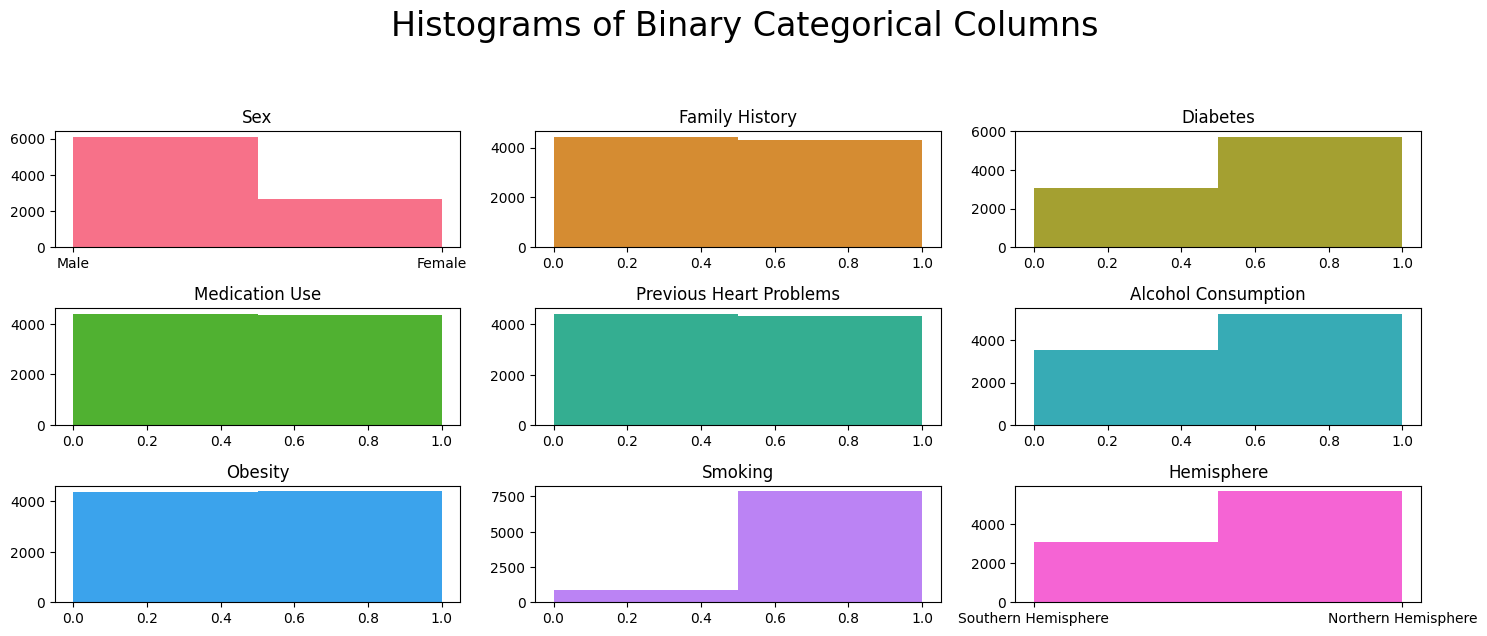

In [662]:
binary_categorical_feature_cols = [
    'Sex',
    'Family History',
    'Diabetes',
    'Medication Use',
    'Previous Heart Problems',
    'Alcohol Consumption',
    'Obesity',
    'Smoking',
    'Hemisphere'
]

df_binary_categorical_features = df[binary_categorical_feature_cols]
# Define a color palette with distinct colors
binary_categorical_feature_cols_palette = sns.color_palette("husl", len(binary_categorical_feature_cols))
# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Binary Categorical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i in range(df_binary_categorical_features.shape[1]):
    plt.subplot(6, 3, i + 1 )
    f = plt.gca()
    f.set_title(df_binary_categorical_features.columns.values[i])

    vals = np.size(df_binary_categorical_features.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    # Use the color palette for each subplot
    plt.hist(
        df_binary_categorical_features.iloc[:, i],
        bins=vals,
        color=binary_categorical_feature_cols_palette[i]
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

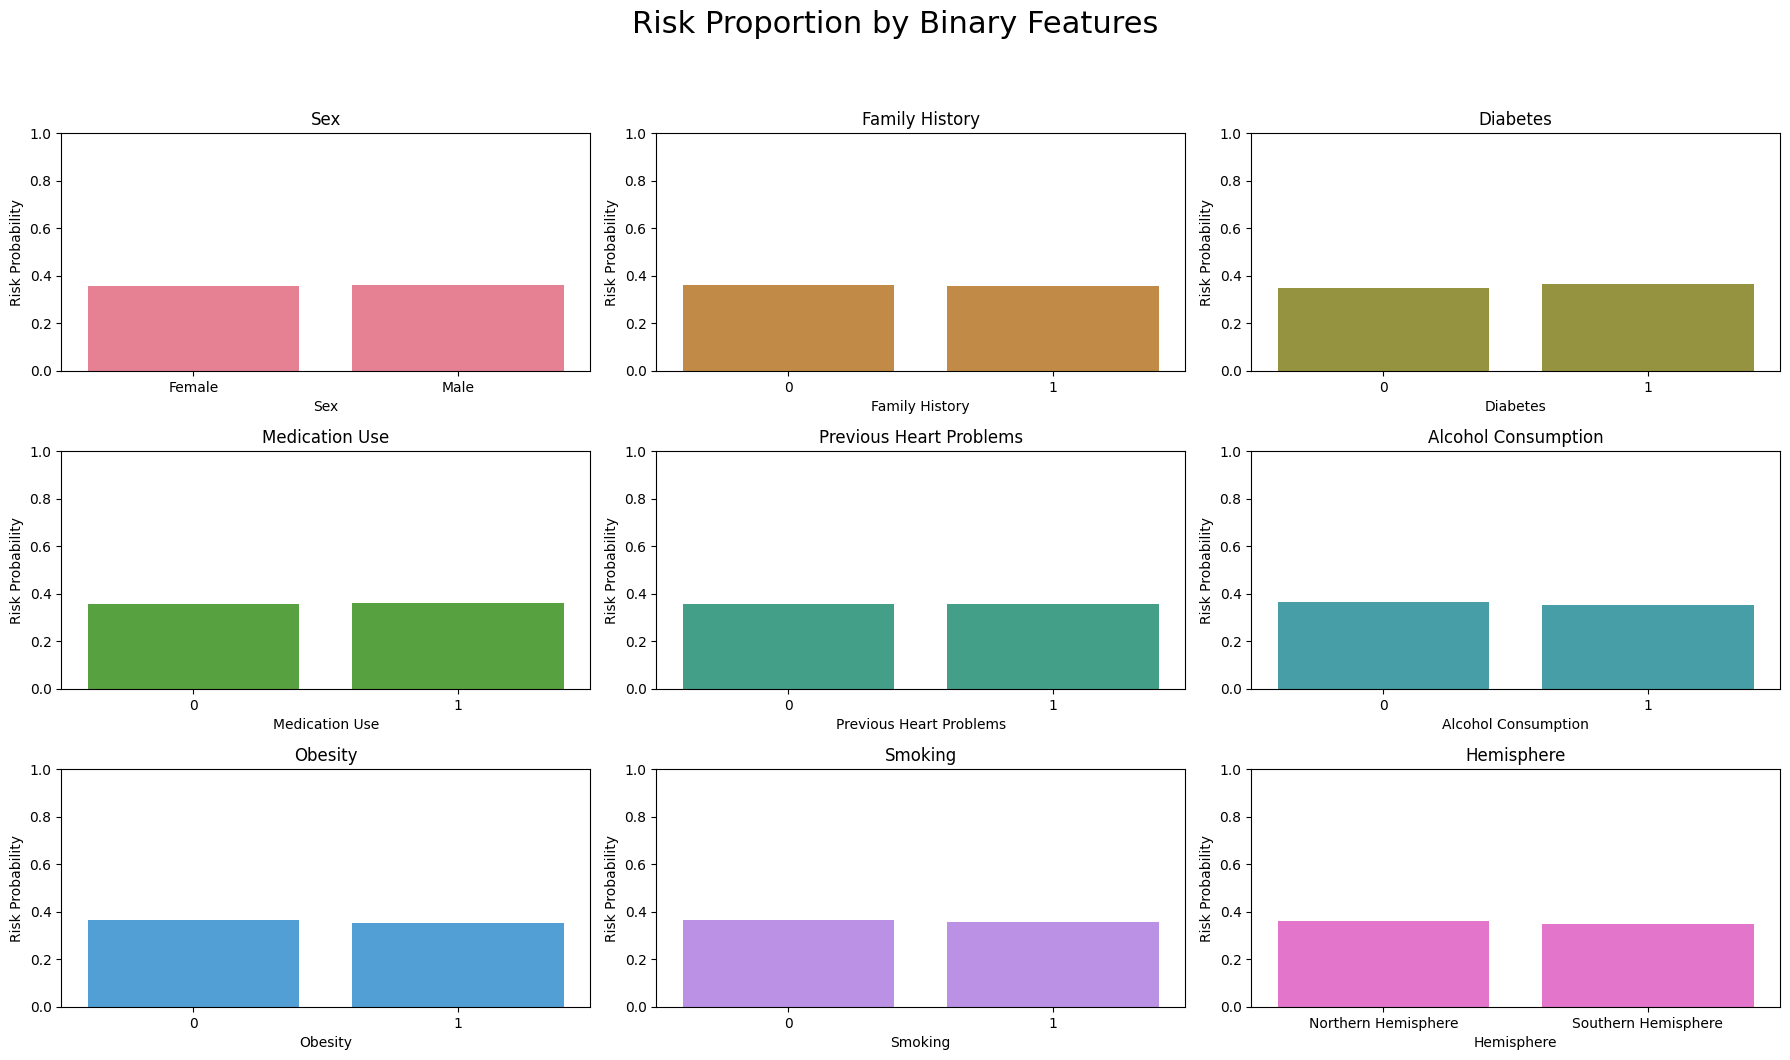

In [663]:
fig = plt.figure(figsize=(18, 14))
plt.suptitle("Risk Proportion by Binary Features", fontsize=22)

for i, col in enumerate(binary_categorical_feature_cols):
    plt.subplot(4, 3, i + 1)

    prop_df = (
        df.groupby(col)["Heart Attack Risk"]
        .mean()
        .reset_index()
    )

    sns.barplot(
        data=prop_df,
        x=col,
        y="Heart Attack Risk",
        color=binary_categorical_feature_cols_palette[i]
    )

    plt.ylim(0, 1)
    plt.title(col)
    plt.ylabel("Risk Probability")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


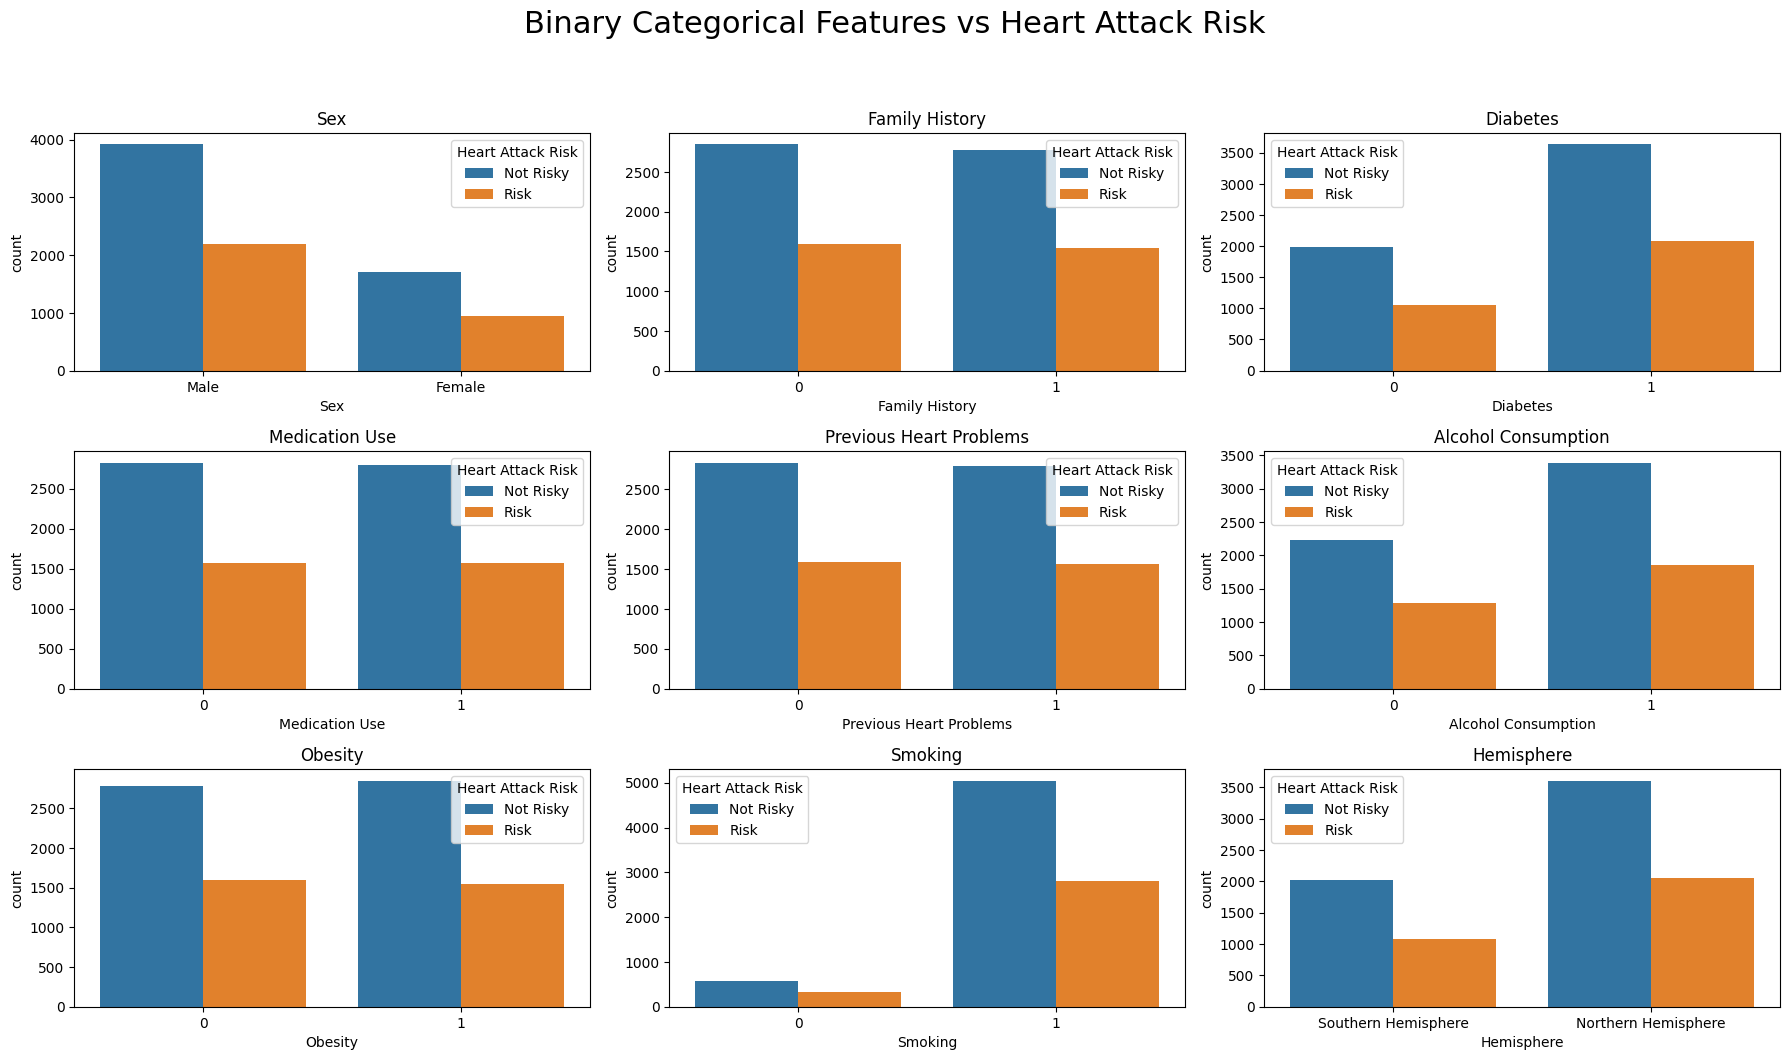

In [664]:
fig = plt.figure(figsize=(18, 14))
plt.suptitle("Binary Categorical Features vs Heart Attack Risk", fontsize=22)

for i, col in enumerate(binary_categorical_feature_cols):
    plt.subplot(4, 3, i + 1)

    ax = sns.countplot(
        data=df,
        x=col,
        hue="Heart Attack Risk"
    )

    plt.title(col)

    # Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        ["Not Risky", "Risk"],
        title="Heart Attack Risk"
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Multi Category Features

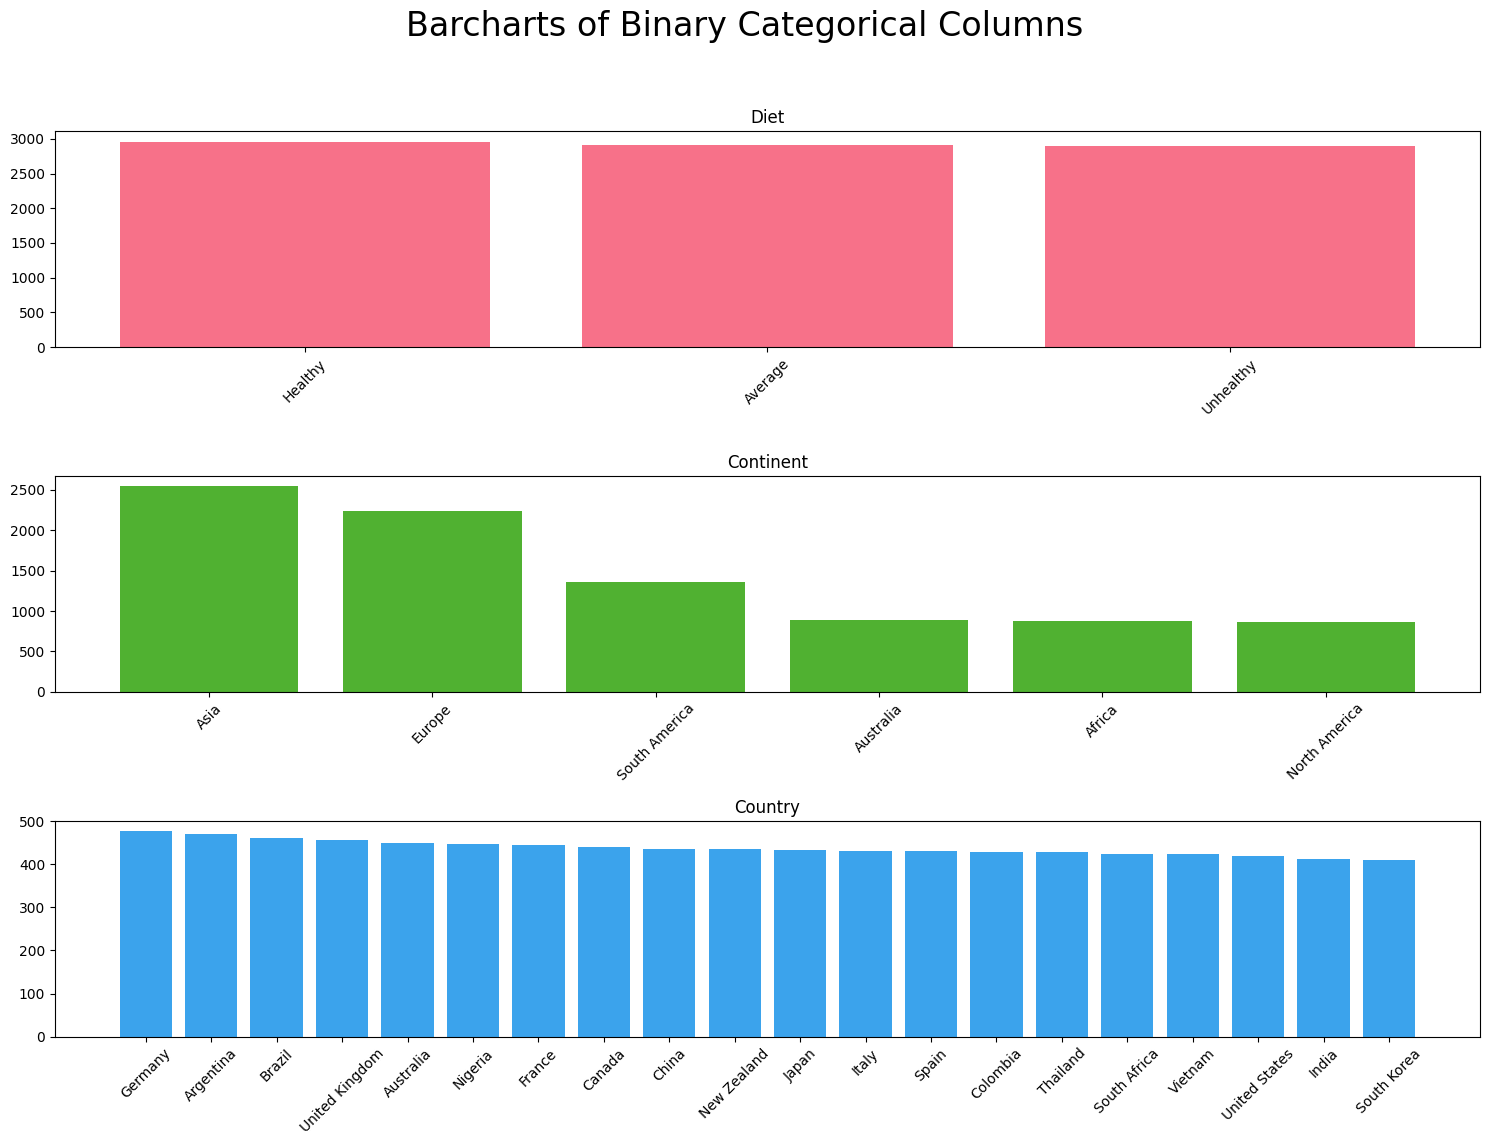

In [665]:
multi_categorical_feature_cols = [
    'Diet',
    'Continent',
    'Country'
]

df_multi_categorical_features = df[multi_categorical_feature_cols]
# Define a color palette with distinct colors
multi_categorical_feature_cols_palette = sns.color_palette("husl", len(multi_categorical_feature_cols))
# Barchart:
fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Barcharts of Binary Categorical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i, col in enumerate(df_multi_categorical_features.columns):
    plt.subplot(3, 1, i + 1)
    ax = plt.gca()
    ax.set_title(col)

    value_counts = df_multi_categorical_features[col].value_counts()

    ax.bar(
        value_counts.index.astype(str),
        value_counts.values,
        color=multi_categorical_feature_cols_palette[i]
    )

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

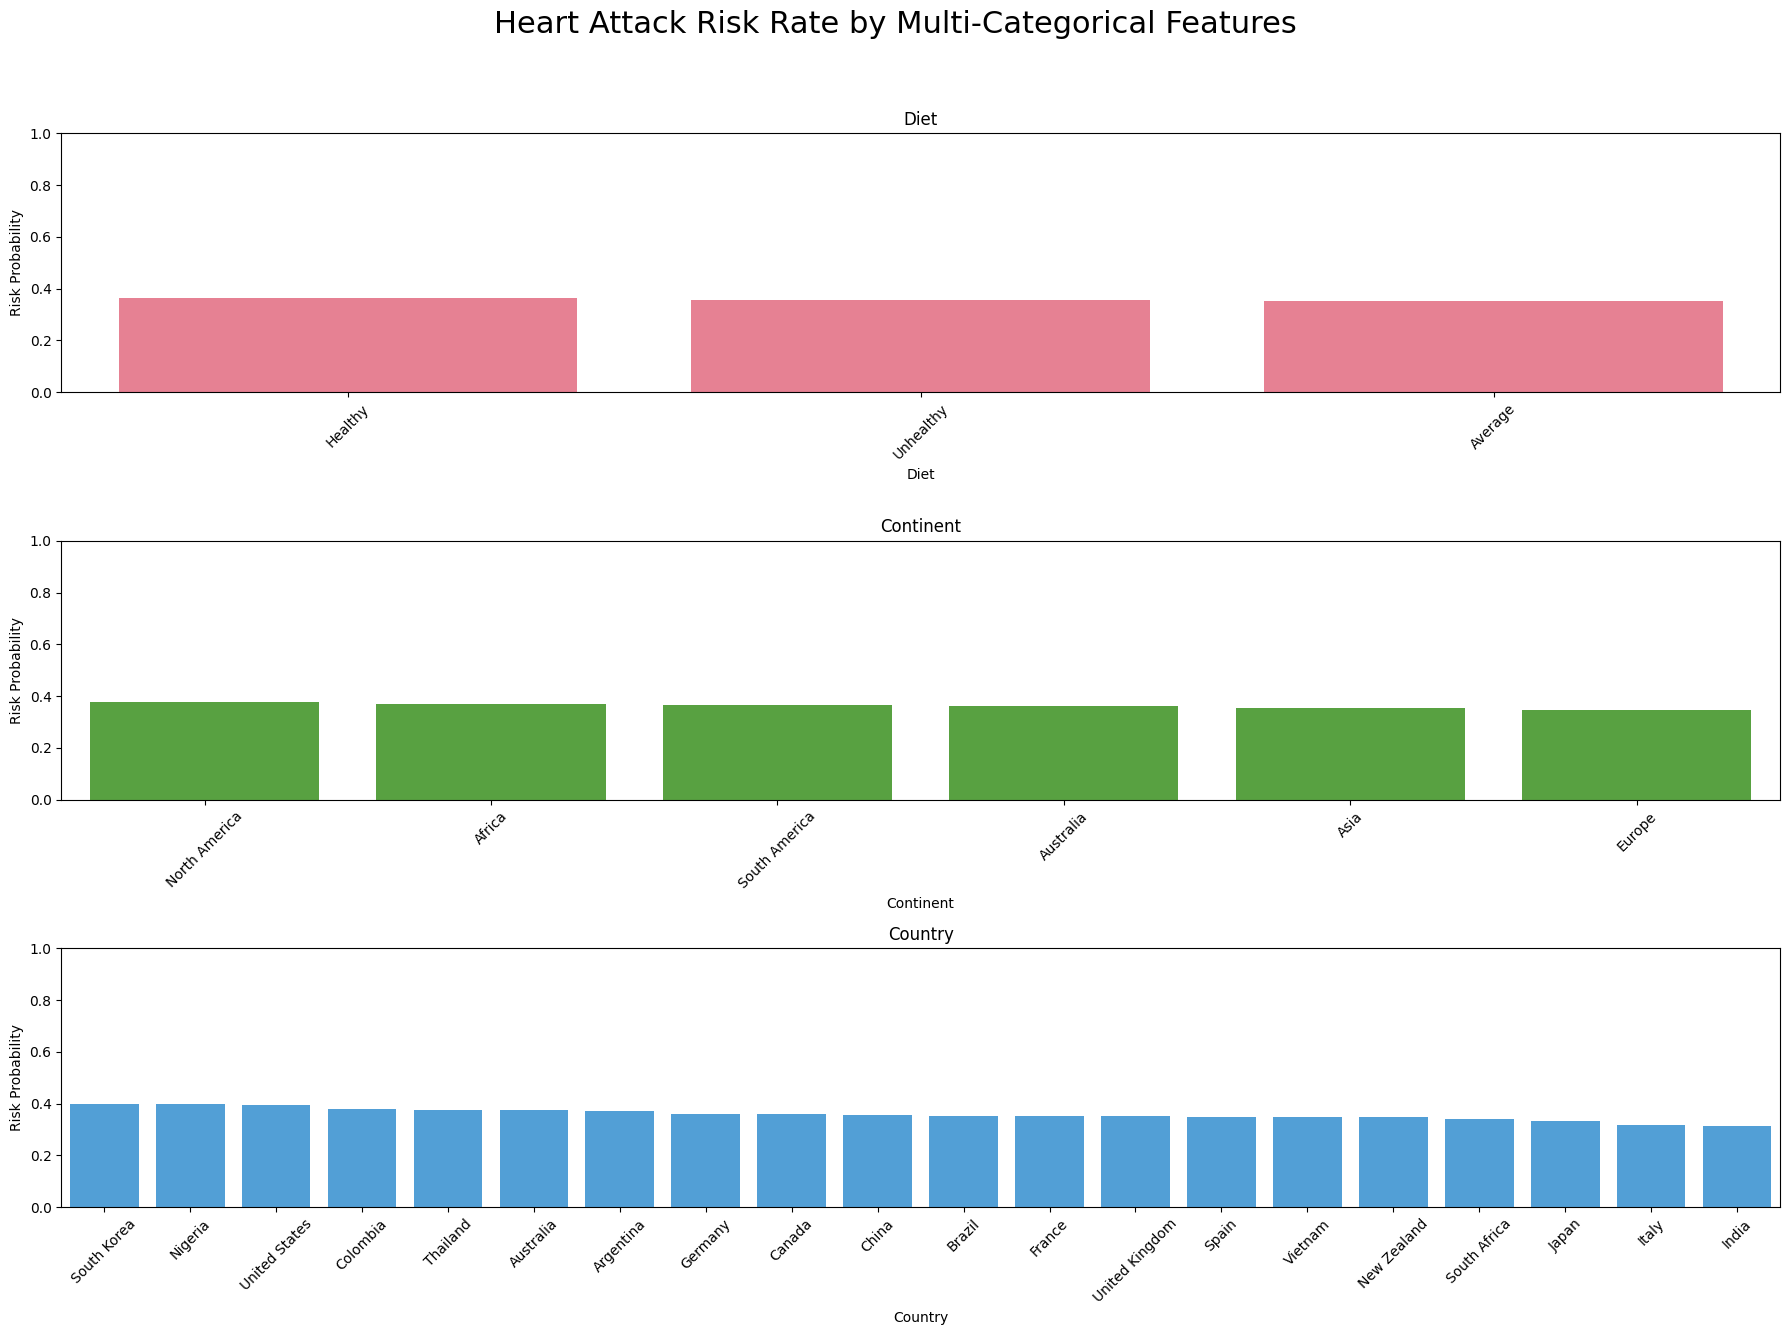

In [666]:
fig = plt.figure(figsize=(18, 14))
plt.suptitle(
    "Heart Attack Risk Rate by Multi-Categorical Features",
    fontsize=22
)

for i, col in enumerate(multi_categorical_feature_cols):
    plt.subplot(3, 1, i + 1)

    prop_df = (
        df.groupby(col)["Heart Attack Risk"]
        .mean()
        .reset_index()
        .sort_values("Heart Attack Risk", ascending=False)
    )

    sns.barplot(
        data=prop_df,
        x=col,
        y="Heart Attack Risk",
        color=multi_categorical_feature_cols_palette[i]
    )

    plt.ylim(0, 1)
    plt.title(col)
    plt.ylabel("Risk Probability")
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


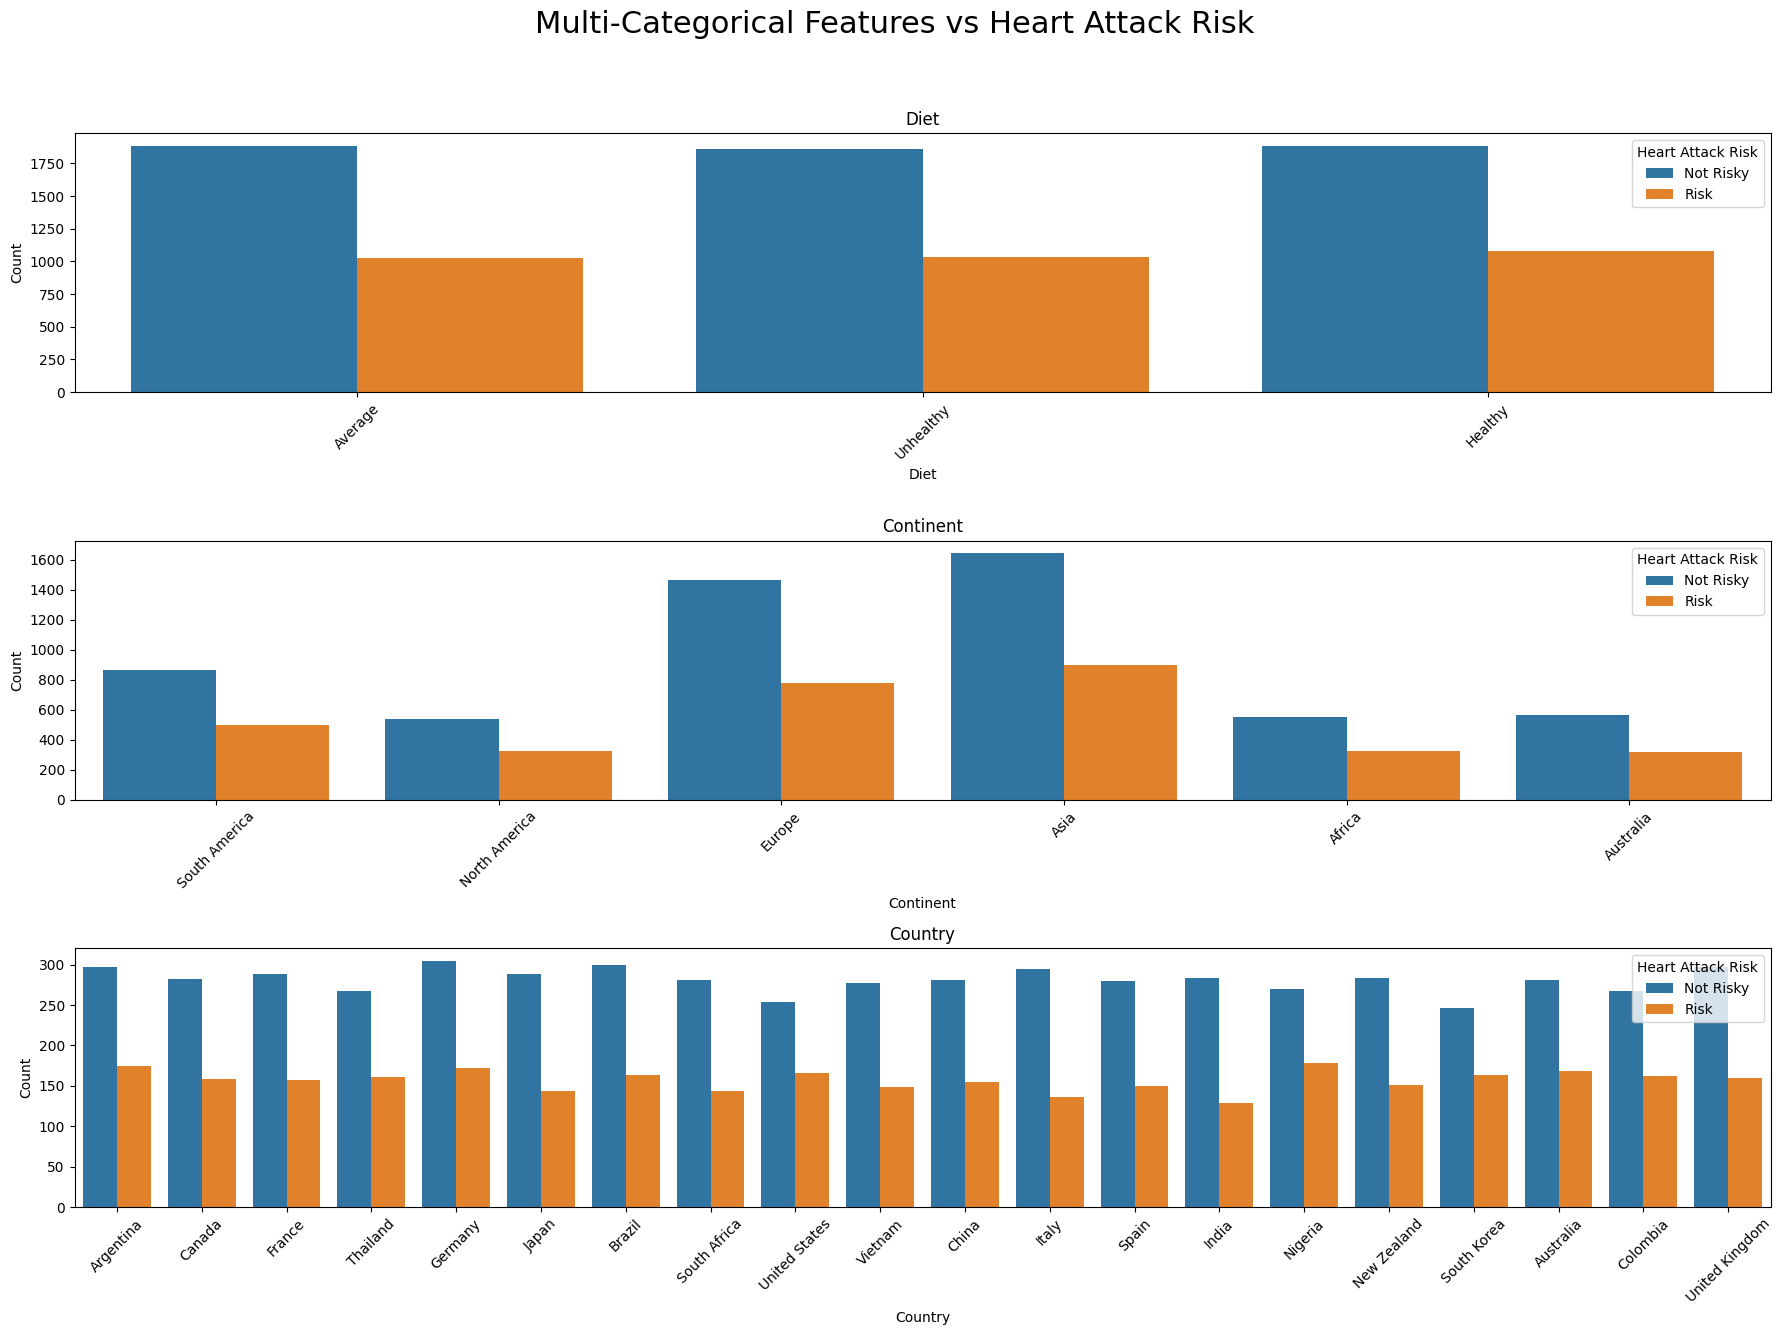

In [667]:
fig = plt.figure(figsize=(18, 14))
plt.suptitle(
    "Multi-Categorical Features vs Heart Attack Risk",
    fontsize=22
)

for i, col in enumerate(multi_categorical_feature_cols):
    plt.subplot(3, 1, i + 1)

    ax = sns.countplot(
        data=df,
        x=col,
        hue="Heart Attack Risk"
    )

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        ["Not Risky", "Risk"],
        title="Heart Attack Risk"
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Encoding

In [668]:
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [669]:
df_copy = df.copy()
df_copy

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


#### Label Encoding

In [670]:
# Label Encode Binary data

# Dictionary to store encoders
leEncoders = {}
# Create a LabelEncoder object
le = LabelEncoder()

# Identify columns with 2 or fewer unique values and are of object type
binary_cols = [col for col in df_copy.columns[1:] if df_copy[col].dtype == 'object' and len(df_copy[col].unique()) <= 2]

# Fit and store LabelEncoders
for col in binary_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    leEncoders[col] = le  # save the encoder for this column
    print(f"{col} column was label encoded.")

# Save all encoders to a pickle file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(leEncoders, f)

print(f"{len(binary_cols)} columns were label encoded.")

Sex column was label encoded.
Hemisphere column was label encoded.
2 columns were label encoded.


In [671]:
df_copy.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,BMW7812,67,1,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,1,0,158,88
1,CZE1114,21,1,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,0,0,165,93
2,BNI9906,21,0,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,0,0,174,99
3,JLN3497,84,1,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,0,0,163,100
4,GFO8847,66,1,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,0,0,91,88


#### One Hot Encoding

In [672]:
# One Hot Encode Multiple Categorical data

# Create a OneHotEncoder object
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)

# Identify columns with 3-10 unique values and are of object type
multiple_cols = [
    col for col in df_copy.columns[1:]
    if df_copy[col].dtype == 'object' and 3 <= len(df_copy[col].unique()) <= 10
]

# Fit encoder on your selected columns
ohe.fit(df_copy[multiple_cols])

# Transform the data
encoded_array = ohe.transform(df_copy[multiple_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(multiple_cols),
    index=df_copy.index
)

# Drop original columns and join the new one-hot columns
df_copy = df_copy.drop(columns=multiple_cols).join(encoded_df)

# Save all encoders to a pickle file
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

print(f"{len(multiple_cols)} columns were one hot encoded.")

2 columns were one hot encoded.


In [673]:
df_copy.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,BMW7812,67,1,208,158/88,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,1,0,158,88,1,0,0,0,0,0,0,0,1
1,CZE1114,21,1,389,165/93,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,0,0,165,93,0,0,1,0,0,0,0,1,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,France,0,0,174,99,0,1,0,0,0,0,1,0,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,0,0,163,100,1,0,0,0,0,0,0,1,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0,0,91,88,0,0,1,0,1,0,0,0,0


#### Risk rate Encoding

In [674]:
# Hitung mean risk per country
country_risk_map = df_copy.groupby('Country')['Heart Attack Risk'].mean().to_dict()

# Hitung global mean
global_mean_risk = df_copy['Heart Attack Risk'].mean()

# Mapping dengan default
df_copy['Country_risk_encoded'] = df_copy['Country'].map(lambda x: country_risk_map.get(x, global_mean_risk))

# Simpan mapping + global mean sekaligus
risk_encoder = {
    'mapping': country_risk_map,
    'global_mean': global_mean_risk
}

with open('risk_encoder.pkl', 'wb') as f:
    pickle.dump(risk_encoder, f)

In [675]:
df_copy.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Country_risk_encoded
0,BMW7812,67,1,208,158/88,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,1,0,158,88,1,0,0,0,0,0,0,0,1,0.369427
1,CZE1114,21,1,389,165/93,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,0,0,165,93,0,0,1,0,0,0,0,1,0,0.359091
2,BNI9906,21,0,324,174/99,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,France,0,0,174,99,0,1,0,0,0,0,1,0,0,0.352018
3,JLN3497,84,1,383,163/100,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,0,0,163,100,1,0,0,0,0,0,0,1,0,0.359091
4,GFO8847,66,1,318,91/88,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0,0,91,88,0,0,1,0,1,0,0,0,0,0.376168


### Cleaning Data

In [676]:
df_copy.drop(columns = ['Country', 'Blood Pressure'], inplace = True)

In [677]:
df_copy

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Country_risk_encoded
0,BMW7812,67,1,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,1,0,158,88,1,0,0,0,0,0,0,0,1,0.369427
1,CZE1114,21,1,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0,0,165,93,0,0,1,0,0,0,0,1,0,0.359091
2,BNI9906,21,0,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0,0,174,99,0,1,0,0,0,0,1,0,0,0.352018
3,JLN3497,84,1,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0,0,163,100,1,0,0,0,0,0,0,1,0,0.359091
4,GFO8847,66,1,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0,0,91,88,0,0,1,0,1,0,0,0,0,0.376168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,0,0,94,76,0,1,0,0,1,0,0,0,0,0.376168
8759,QSV6764,28,0,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,0,0,157,102,0,1,0,0,0,0,0,1,0,0.359091
8760,XKA5925,47,1,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,1,1,161,75,1,0,0,0,0,0,0,0,1,0.352814
8761,EPE6801,36,1,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,1,0,119,67,0,0,1,0,0,0,0,0,1,0.352814


### Feature Selection

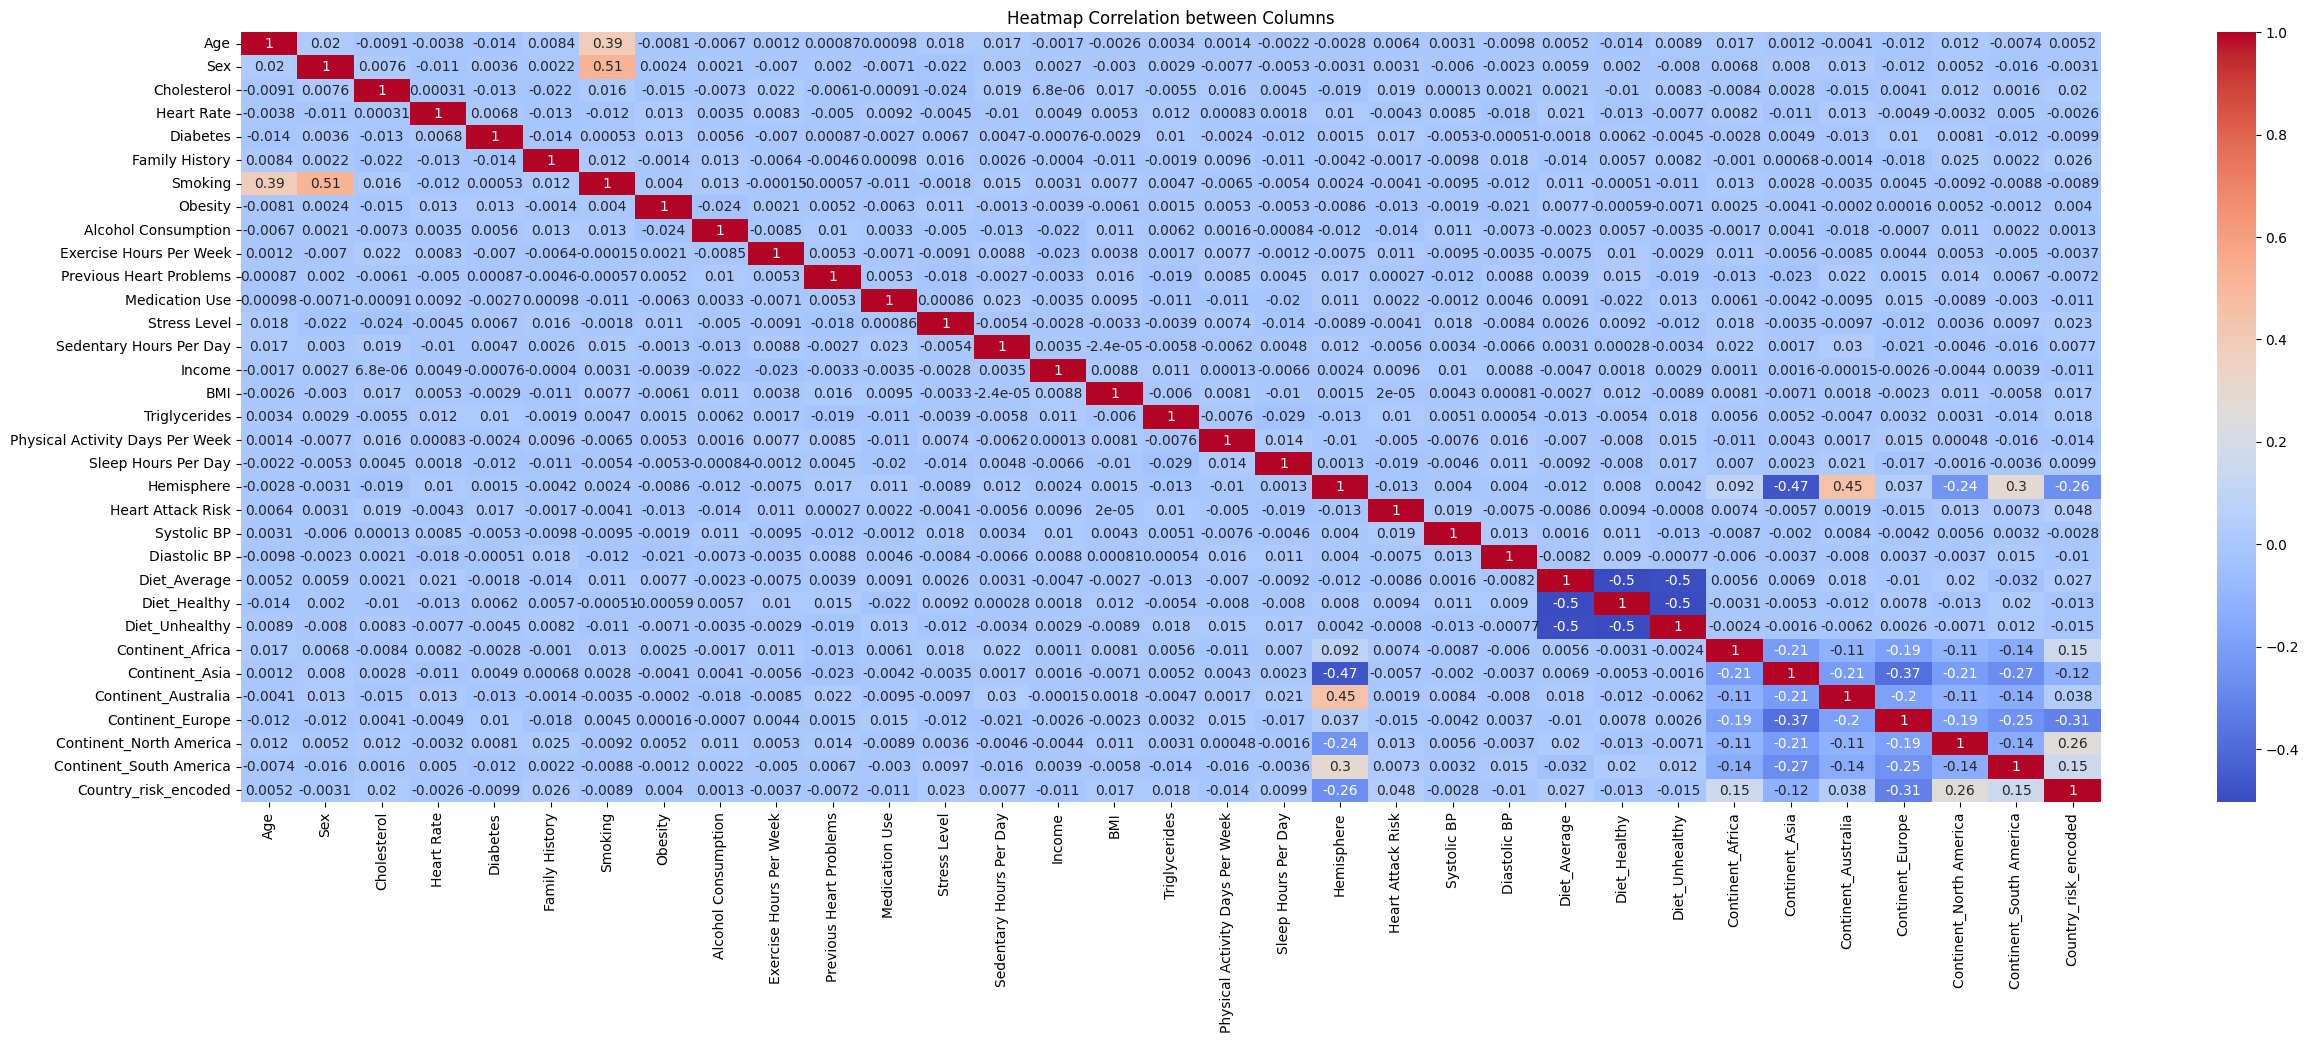

In [678]:
corr = df_copy.select_dtypes(include = 'number').corr()

plt.figure(figsize = (30, 10))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Heatmap Correlation between Columns')
plt.show()

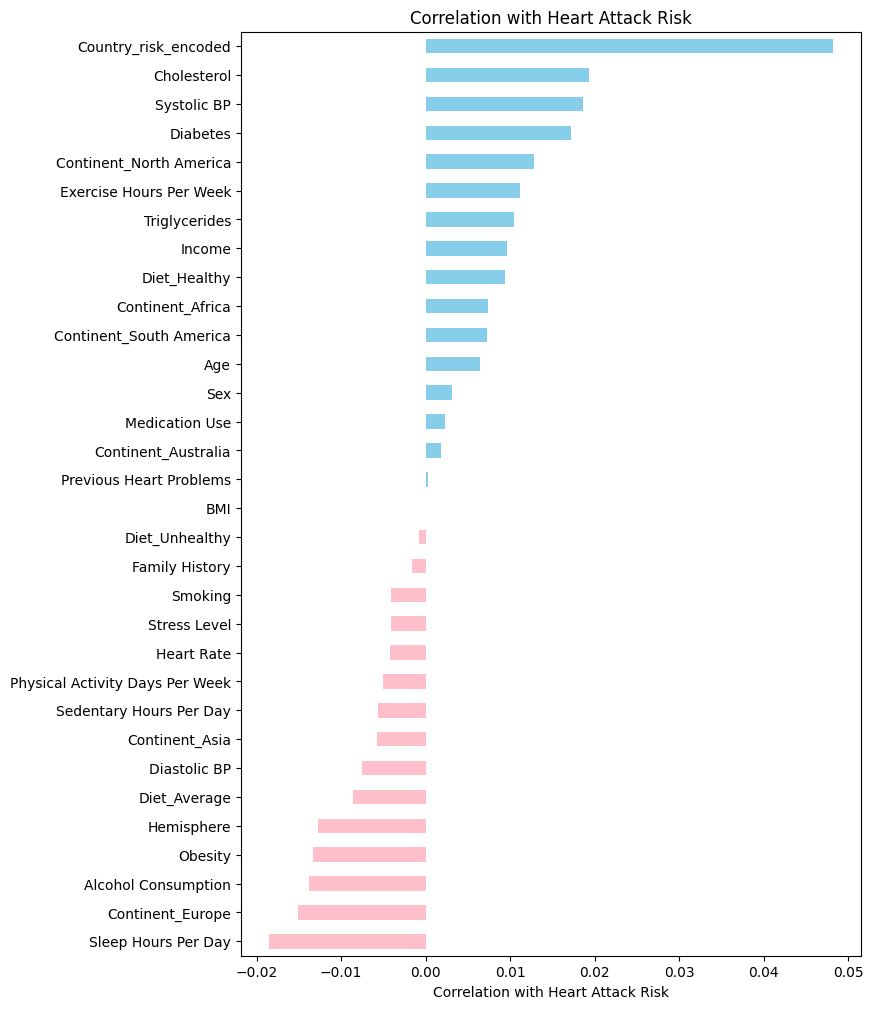

In [679]:
plt.figure(figsize=(8,12))


corr_values = df_copy.select_dtypes(include='number').corr()['Heart Attack Risk'].drop('Heart Attack Risk')
corr_values = corr_values.sort_values(ascending=True)

colors = ['pink' if val < 0 else 'skyblue' for val in corr_values]


corr_values.plot(kind='barh', color=colors)

plt.title('Correlation with Heart Attack Risk')
plt.xlabel('Correlation with Heart Attack Risk')
plt.ylabel('')
plt.show()

Sepertinya BMI tidak relevan jadi ga dipake deh buat training.

- Bloop Pressure
- Diet


- Country
- Cholesterol
- Diabetes
- Exercise Hours Per Week

- Sleep Hours Per Day
- Alcohol Consumption
- Obesity
- Hemisphere

In [680]:
features_to_drop = [
    'BMI',
    'Previous Heart Problems',
    'Family History',
    'Medication Use',
    'Sex',
    'Smoking',
    'Stress Level',
    'Heart Rate',
    'Age',
    'Physical Activity Days Per Week',
    'Sedentary Hours Per Day',
    'Income',
    'Triglycerides',
    # 'Exercise Hours Per Week',
]
continent_feature = [col for col in df_copy.columns if col.startswith('Continent_')]
features_to_drop.extend(continent_feature)
# diet_feature = [col for col in df_copy.columns if col.startswith('Diet_')]
# features_to_drop.extend(diet_feature)


df_copy.drop(columns=features_to_drop, inplace=True)

### Split Dataset into Dependent and Independent Variables

In [681]:
# identify response variable:
X = df_copy.drop(columns="Heart Attack Risk")
y = df_copy["Heart Attack Risk"]
df_copy.shape, X.shape, y.shape

((8763, 15), (8763, 14), (8763,))

### Generate training and test datasets of dependent and independent variables

In [682]:
#Generate training and test datasets of dependent and independent variables
random_state_value = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2, # use 0.1 if data is huge.
    random_state= random_state_value
)

# to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7010, 14)
Number transactions y_train dataset:  (7010,)
Number transactions X_test dataset:  (1753, 14)
Number transactions y_test dataset:  (1753,)


In [683]:
y_train.value_counts(normalize=True)

,proportion
Heart Attack Risk,
0,0.641797
1,0.358203


In [684]:
y_test.value_counts(normalize=True)

,proportion
Heart Attack Risk,
0,0.641757
1,0.358243


In [685]:
X_train

,Patient ID,Cholesterol,Diabetes,Obesity,Alcohol Consumption,Exercise Hours Per Week,Sleep Hours Per Day,Hemisphere,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Country_risk_encoded
1034,TFJ2083,250,1,0,1,2.392506,5,1,109,76,0,1,0,0.347126
5408,DSA6154,172,1,1,0,9.494553,8,0,134,106,1,0,0,0.397321
7150,IFA1134,158,1,0,1,6.292732,10,0,116,75,0,0,1,0.352018
2392,NLF2322,305,0,0,0,14.217426,5,0,139,108,0,1,0,0.313107
3658,HUA9771,373,1,1,1,9.130029,6,1,101,73,0,0,1,0.338824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,PWM4137,195,0,0,1,1.041220,10,1,121,92,1,0,0,0.348837
2896,BPY9823,376,0,1,0,5.364292,6,1,102,98,1,0,0,0.374165
7409,FQD0873,394,0,1,0,4.803011,7,0,95,64,1,0,0,0.377622
2942,DPY7852,399,0,1,1,11.775044,9,0,92,81,0,1,0,0.348235


## Removing Identifiers

In [686]:
# Removing Identifiers
train_id = X_train["Patient ID"]
X_train = X_train.drop(columns=["Patient ID"])

test_id = X_test["Patient ID"]
X_test = X_test.drop(columns=["Patient ID"])

In [687]:
X_train

,Cholesterol,Diabetes,Obesity,Alcohol Consumption,Exercise Hours Per Week,Sleep Hours Per Day,Hemisphere,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Country_risk_encoded
1034,250,1,0,1,2.392506,5,1,109,76,0,1,0,0.347126
5408,172,1,1,0,9.494553,8,0,134,106,1,0,0,0.397321
7150,158,1,0,1,6.292732,10,0,116,75,0,0,1,0.352018
2392,305,0,0,0,14.217426,5,0,139,108,0,1,0,0.313107
3658,373,1,1,1,9.130029,6,1,101,73,0,0,1,0.338824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,195,0,0,1,1.041220,10,1,121,92,1,0,0,0.348837
2896,376,0,1,0,5.364292,6,1,102,98,1,0,0,0.374165
7409,394,0,1,0,4.803011,7,0,95,64,1,0,0,0.377622
2942,399,0,1,1,11.775044,9,0,92,81,0,1,0,0.348235


## Feature Scaling

In [688]:
#Train
sc_X = StandardScaler()
X_train_columns = X_train.columns
X_train_index = X_train.index

X_train = pd.DataFrame(
    sc_X.fit_transform(X_train),
    columns = X_train_columns,
    index = X_train_index
)

#Test
X_test_columns = X_test.columns
X_test_index = X_test.index

X_test = pd.DataFrame(
    sc_X.transform(X_test),
    columns = X_test_columns,
    index = X_test_index
)

In [689]:
X_train

,Cholesterol,Diabetes,Obesity,Alcohol Consumption,Exercise Hours Per Week,Sleep Hours Per Day,Hemisphere,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Country_risk_encoded
1034,-0.128043,0.738291,-1.004862,0.827216,-1.318283,-1.006112,1.345221,-0.985628,-0.619998,-0.710590,1.404585,-0.698801,-0.476883
5408,-1.090503,0.738291,0.995161,-1.208874,-0.092108,0.502195,-0.743372,-0.035145,1.421616,1.407282,-0.711954,-0.698801,1.706070
7150,-1.263252,0.738291,-1.004862,0.827216,-0.644905,1.507733,-0.743372,-0.719492,-0.688052,-0.710590,-0.711954,1.431023,-0.264154
2392,0.550615,-1.354479,-1.004862,-1.208874,0.723300,-1.006112,-0.743372,0.154952,1.557724,-0.710590,1.404585,-0.698801,-1.956378
3658,1.389682,0.738291,0.995161,0.827216,-0.155044,-0.503343,1.345221,-1.289782,-0.824160,-0.710590,-0.711954,1.431023,-0.837971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,-0.806700,-1.354479,-1.004862,0.827216,-1.551583,1.507733,1.345221,-0.529396,0.468863,1.407282,-0.711954,-0.698801,-0.402482
2896,1.426700,-1.354479,0.995161,-1.208874,-0.805201,-0.503343,1.345221,-1.251763,0.877186,1.407282,-0.711954,-0.698801,0.699001
7409,1.648806,-1.354479,0.995161,-1.208874,-0.902107,-0.000574,-0.743372,-1.517898,-1.436644,1.407282,-0.711954,-0.698801,0.849369
2942,1.710502,-1.354479,0.995161,0.827216,0.301620,1.004964,-0.743372,-1.631956,-0.279729,-0.710590,1.404585,-0.698801,-0.428659


In [690]:
df_copy.describe()

,Cholesterol,Diabetes,Obesity,Alcohol Consumption,Exercise Hours Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP,Diet_Average,Diet_Healthy,Diet_Unhealthy,Country_risk_encoded
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,259.877211,0.652288,0.501426,0.598083,10.014284,7.023508,0.354102,0.358211,135.075659,85.156111,0.332306,0.337784,0.329910,0.358211
std,80.863276,0.476271,0.500026,0.490313,5.783745,1.988473,0.478268,0.479502,26.349976,14.676565,0.471067,0.472981,0.470207,0.023079
min,120.000000,0.000000,0.000000,0.000000,0.002442,4.000000,0.000000,0.000000,90.000000,60.000000,0.000000,0.000000,0.000000,0.313107
25%,192.000000,0.000000,0.000000,0.000000,4.981579,5.000000,0.000000,0.000000,112.000000,72.000000,0.000000,0.000000,0.000000,0.348235
50%,259.000000,1.000000,1.000000,1.000000,10.069559,7.000000,0.000000,0.000000,135.000000,85.000000,0.000000,0.000000,0.000000,0.355505
75%,330.000000,1.000000,1.000000,1.000000,15.050018,9.000000,1.000000,1.000000,158.000000,98.000000,1.000000,1.000000,1.000000,0.374165
max,400.000000,1.000000,1.000000,1.000000,19.998709,10.000000,1.000000,1.000000,180.000000,110.000000,1.000000,1.000000,1.000000,0.398533


## Model Selection

In [691]:
# sklearn modules for Model Selection
from sklearn import (
    svm, tree, linear_model, neighbors
)
from sklearn import (
    naive_bayes, ensemble,
    discriminant_analysis, gaussian_process
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_value = 100

In [692]:
# List Models
models = []
models.append(
    (
        'Logistic Regression',
        LogisticRegression(
            solver='liblinear',
            random_state=random_state_value,
            class_weight='balanced'
        )
    )
)
models.append(
    (
        'Random Forest',
        RandomForestClassifier(
            n_estimators=n_estimators_value,
            criterion='entropy',
            random_state=random_state_value
        )
    )
)
models.append(
    (
        'XGB',
        XGBClassifier(
            n_estimators=n_estimators_value,
            random_state=random_state_value,
            eval_metric='logloss'
        )
    )
)
models.append(
    (
        'Decision Tree',
        DecisionTreeClassifier(
            criterion='entropy',
            random_state=random_state_value
        )
    )
)

models.append(
    (
        'Gradient Boosting',
        GradientBoostingClassifier(
            random_state=random_state_value
        )
    )
)
models.append(
    (
        'SVC',
        SVC(
            kernel='rbf',
            random_state=random_state_value
        )
    )
)
models.append(
    (
        'KNeighbors',
        KNeighborsClassifier(
            n_neighbors=5
        )
    )
)
models.append(
    (
        'Naive Bayes',
        GaussianNB()
    )
)
models.append(
    (
        'LDA',
        LinearDiscriminantAnalysis()
    )
)

## Evaluate Model

In [693]:
# sklearn modules for Model Evaluation & Improvement
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    f1_score, precision_score,
    recall_score, fbeta_score,
    make_scorer
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import (
    cross_val_score, GridSearchCV, ShuffleSplit, KFold
)

In [694]:
# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to populate with perfo, performance result
# Define scorers
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
col = [
    'Algorithm',
    'ROC AUC Mean', 'ROC AUC STD',
    'Accuracy Mean', 'Accuracy STD',
    'Precision Mean', 'Precision STD',
    'Recall Mean', 'Recall STD',
    'F1 Score Mean', 'F1 Score STD',
    'F2 Score Mean', 'F2 Score STD'
]
model_results = pd.DataFrame(columns = col)

#Evaluate model
i = 0
for name, model in models:
    # kfold = KFold(n_splits = 10) # 10 Cross validation
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state_value)
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    cv_precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring=precision_scorer)
    cv_recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring=recall_scorer)
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=f1_scorer)
    cv_f2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=f2_scorer)
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] =[
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2),
        round(cv_precision.mean()*100, 2), round(cv_precision.std()*100, 2),
        round(cv_recall.mean()*100, 2), round(cv_recall.std()*100, 2),
        round(cv_f1.mean()*100, 2), round(cv_f1.std()*100, 2),
        round(cv_f2.mean()*100, 2), round(cv_f2.std()*100, 2)
    ]
    i += 1

model_results.sort_values(
    by=['ROC AUC Mean'],
    ascending = False
)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Precision STD,Recall Mean,Recall STD,F1 Score Mean,F1 Score STD,F2 Score Mean,F2 Score STD
0,Logistic Regression,52.58,2.65,51.27,1.88,37.04,1.97,51.65,3.81,43.13,2.60,47.87,3.23
8,LDA,52.56,2.65,64.18,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Naive Bayes,52.07,2.28,64.18,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Gradient Boosting,50.63,2.52,63.87,0.53,44.67,16.56,2.15,0.72,4.08,1.34,2.65,0.88
2,XGB,49.18,1.79,57.60,1.20,34.41,2.40,20.19,2.14,25.40,2.09,21.99,2.14
3,Decision Tree,48.70,1.67,52.40,1.37,34.17,2.08,35.64,3.12,34.88,2.53,35.33,2.87
6,KNeighbors,48.30,2.20,56.78,1.32,34.17,2.87,22.34,2.64,26.98,2.64,23.99,2.64
5,SVC,47.94,1.91,64.17,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Random Forest,47.68,2.14,62.04,0.89,33.00,6.31,5.69,1.32,9.68,2.13,6.82,1.56


## SMOTE Oversampling

In [695]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV

Searching Optimum Number of Trees for Random Forest Model

In [696]:
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=random_state_value)),
    ('rf', RandomForestClassifier(random_state=random_state_value))
])

param_grid = {
    'rf__n_estimators': [50, 100, 200, 300],
    'rf__criterion': ['gini', 'entropy']
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state_value)

grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best n_estimators RF:", grid_rf.best_params_)
print("Best ROC AUC:", grid_rf.best_score_)


Best n_estimators RF: {'rf__criterion': 'gini', 'rf__n_estimators': 50}
Best ROC AUC: 0.492591999168455


Searching Optimum Number of Trees for XGB Model

In [697]:
pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=random_state_value)),
    ('xgb', XGBClassifier(
    random_state=random_state_value,
    eval_metric='logloss'
))
])

param_grid = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state_value)

grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Best n_estimators XGB:", grid_xgb.best_params_)
print(grid_xgb.best_score_)

Best n_estimators XGB: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}
0.5160023535088619


Searching Optimum Number of Neighbor for KNN Model

In [698]:
pipeline_knn = Pipeline([
    ('smote', SMOTE(random_state=random_state_value)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3,5,7,9,11,15],
    'knn__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(
    pipeline_knn,
    param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

print("Best n-neigbor:", grid_knn.best_params_)
print("Best ROC AUC Score:", grid_knn.best_score_)

Best n-neigbor: {'knn__n_neighbors': 15, 'knn__weights': 'uniform'}
Best ROC AUC Score: 0.4858421099777367


In [699]:
# update model with the best params
for i, (name, model) in enumerate(models):
    if name == 'Random Forest':
        models[i] = (
            'Random Forest',
            RandomForestClassifier(
                n_estimators=grid_rf.best_params_['rf__n_estimators'],
                criterion=grid_rf.best_params_['rf__criterion'],
                random_state=random_state_value
            )
        )
    if name == 'XGB':
        models[i] = (
            'XGB',
            XGBClassifier(
                n_estimators=grid_xgb.best_params_['xgb__n_estimators'],
                max_depth=grid_xgb.best_params_['xgb__max_depth'],
                learning_rate=grid_xgb.best_params_['xgb__learning_rate'],
                random_state=random_state_value,
                eval_metric='logloss'
            )
        )
    if name == 'KNeighbors':
        models[i] = (
            'KNeighbors',
            KNeighborsClassifier(
                n_neighbors=grid_knn.best_params_['knn__n_neighbors'],
                weights=grid_knn.best_params_['knn__weights']
            )
        )

In [700]:
smote = SMOTE(random_state=random_state_value)

models_smote = []
for name, model in models:
    pipeline = Pipeline([
        ('smote', smote),
        ('model', model)
    ])
    models_smote.append((name, pipeline))


# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to populate with perfo, performance result
# Define scorers
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
col = [
    'Algorithm',
    'ROC AUC Mean', 'ROC AUC STD',
    'Accuracy Mean', 'Accuracy STD',
    'Precision Mean', 'Precision STD',
    'Recall Mean', 'Recall STD',
    'F1 Score Mean', 'F1 Score STD',
    'F2 Score Mean', 'F2 Score STD'
]
model_smote_results = pd.DataFrame(columns = col)

#Evaluate model
i = 0
for name, model in models_smote:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state_value)
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    cv_precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring=precision_scorer)
    cv_recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring=recall_scorer)
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=f1_scorer)
    cv_f2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=f2_scorer)
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_smote_results.loc[i] =[
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2),
        round(cv_precision.mean()*100, 2), round(cv_precision.std()*100, 2),
        round(cv_recall.mean()*100, 2), round(cv_recall.std()*100, 2),
        round(cv_f1.mean()*100, 2), round(cv_f1.std()*100, 2),
        round(cv_f2.mean()*100, 2), round(cv_f2.std()*100, 2)
    ]
    i += 1

model_smote_results.sort_values(
    by=['ROC AUC Mean'],
    ascending = False
)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Precision STD,Recall Mean,Recall STD,F1 Score Mean,F1 Score STD,F2 Score Mean,F2 Score STD
8,LDA,52.54,2.57,52.20,1.49,37.92,1.38,52.45,2.19,44.01,1.62,48.71,1.90
0,Logistic Regression,52.53,2.57,52.20,1.49,37.92,1.38,52.45,2.19,44.01,1.62,48.71,1.90
7,Naive Bayes,51.94,2.55,50.88,1.23,37.01,1.29,52.97,3.43,43.55,1.95,48.74,2.69
2,XGB,51.60,1.77,47.80,3.87,36.73,1.61,62.29,11.38,45.68,3.62,54.19,7.52
4,Gradient Boosting,50.22,2.44,62.58,0.96,36.33,6.14,5.53,1.45,9.53,2.26,6.65,1.69
1,Random Forest,49.26,2.75,57.29,2.00,34.08,4.68,20.63,3.15,25.68,3.69,22.39,3.34
3,Decision Tree,48.92,1.62,52.13,1.31,34.51,1.92,37.64,3.25,35.99,2.46,36.95,2.90
6,KNeighbors,48.58,2.29,48.54,1.72,34.93,1.68,50.62,3.52,41.31,2.21,46.42,2.85
5,SVC,48.11,3.02,49.26,2.20,34.61,2.04,46.71,2.80,39.74,2.23,43.65,2.49


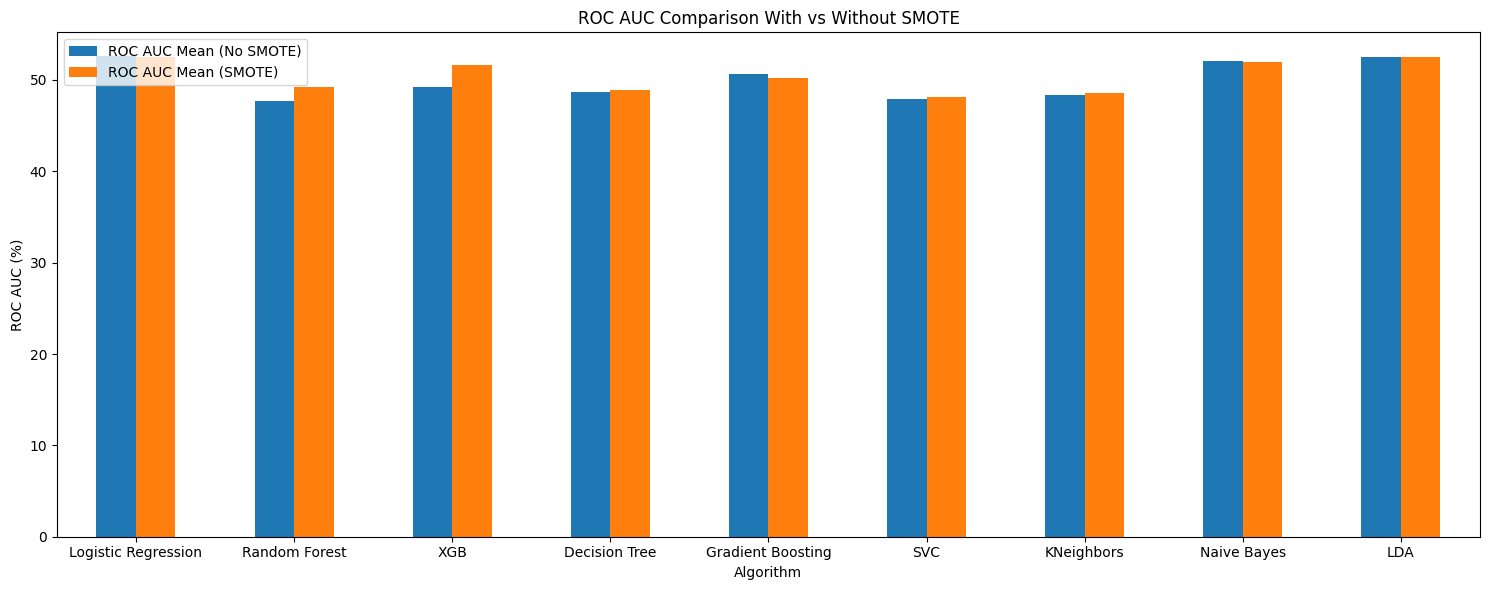

In [709]:
cols_mean = ['Algorithm', 'ROC AUC Mean', 'Accuracy Mean', 'Precision Mean', 'Recall Mean', 'F1 Score Mean', 'F2 Score Mean']

df_no_smote = model_results[cols_mean].set_index('Algorithm')
df_smote = model_smote_results[cols_mean].set_index('Algorithm')

# Combine into a single DataFrame for comparison
df_compare = pd.concat(
    [df_no_smote.add_suffix(' (No SMOTE)'), df_smote.add_suffix(' (SMOTE)')],
    axis=1
)

# Plot ROC AUC comparison as an example
df_compare[['ROC AUC Mean (No SMOTE)', 'ROC AUC Mean (SMOTE)']].plot(
    kind='bar',
    figsize=(15,6),
    rot=0,
    title='ROC AUC Comparison With vs Without SMOTE'
)

plt.ylabel('ROC AUC (%)')
plt.tight_layout()
plt.show()

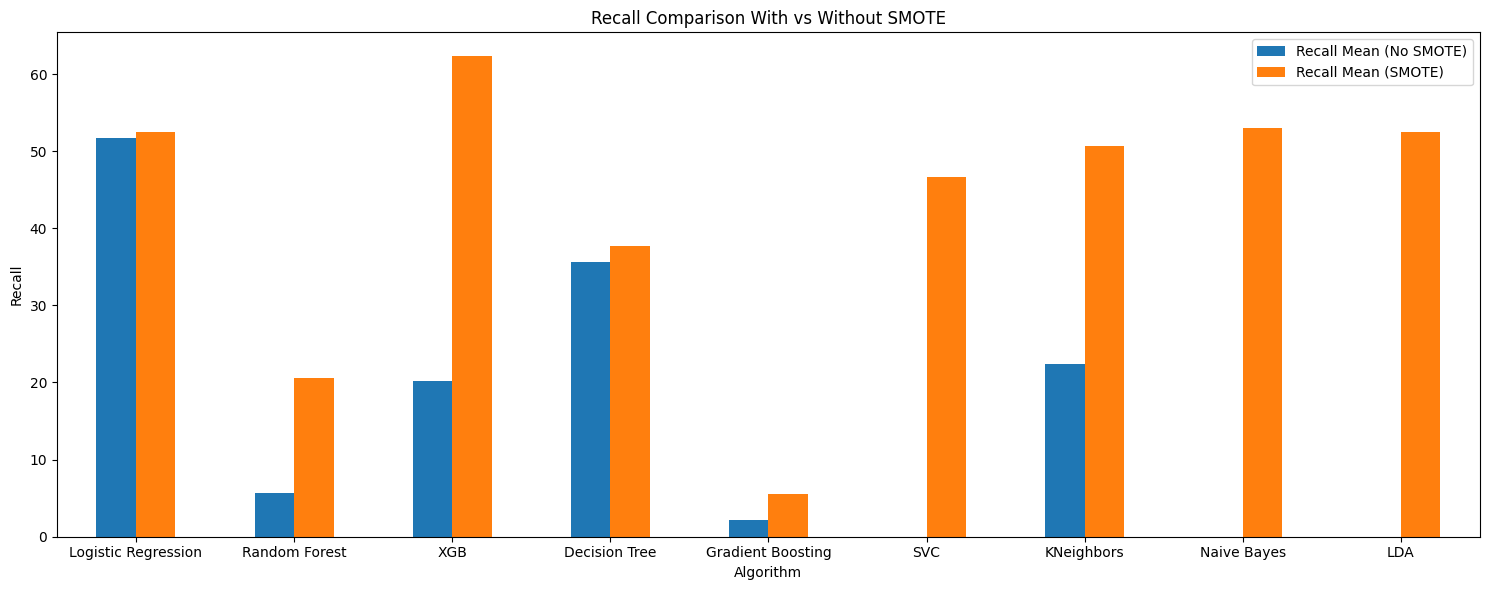

In [710]:
# Plot Recall comparison
df_compare[['Recall Mean (No SMOTE)', 'Recall Mean (SMOTE)']].plot(
    kind='bar',
    figsize=(15,6),
    rot=0,
    title='Recall Comparison With vs Without SMOTE'
)

plt.ylabel('Recall')
plt.tight_layout()
plt.show()

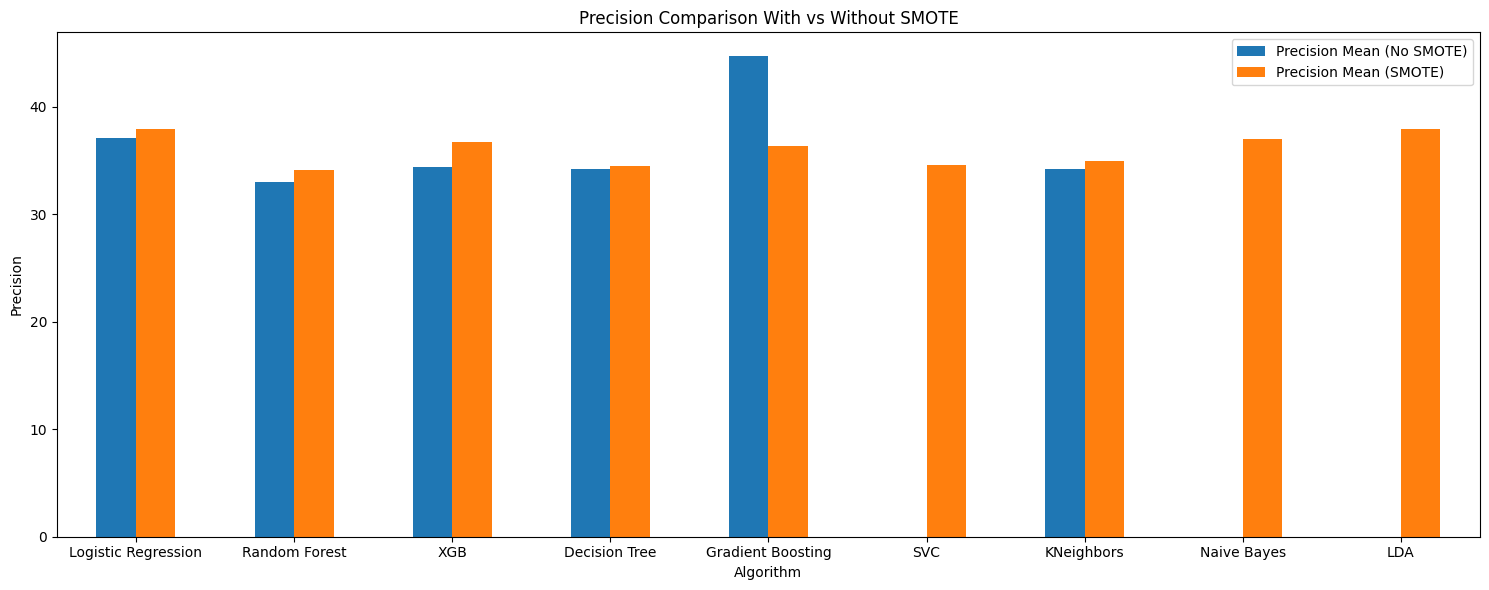

In [711]:
# Plot Precision comparison
df_compare[['Precision Mean (No SMOTE)', 'Precision Mean (SMOTE)']].plot(
    kind='bar',
    figsize=(15,6),
    rot=0,
    title='Precision Comparison With vs Without SMOTE'
)

plt.ylabel('Precision')
plt.tight_layout()
plt.show()

In [712]:
LDA_model = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',models_smote[8][1]) #LDA
])
# Fit Chosen Model on the Training dataset:
LDA_model.fit(X_train, y_train)
# Predict the Test set results
y_pred = LDA_model.predict(X_test)
y_proba = LDA_model.predict_proba(X_test)[:, 1]
# Evaluate Model Results on Test Set:
print(classification_report(y_test, y_pred))
print("LDA ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1125
           1       0.37      0.51      0.43       628

    accuracy                           0.51      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.51      0.52      1753

LDA ROC AUC: 0.5294762915782024


In [713]:
XGB_model = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model',models_smote[2][1]) #XGB
])
# Fit Chosen Model on the Training dataset:
XGB_model.fit(X_train, y_train)
# Predict the Test set results
y_pred = XGB_model.predict(X_test)
y_proba = XGB_model.predict_proba(X_test)[:, 1]
# Evaluate Model Results on Test Set:
print(classification_report(y_test, y_pred))
print("XGB ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.64      0.31      0.42      1125
           1       0.36      0.68      0.47       628

    accuracy                           0.44      1753
   macro avg       0.50      0.50      0.44      1753
weighted avg       0.54      0.44      0.43      1753

XGB ROC AUC: 0.5129532908704885


In [714]:
input_data = pd.DataFrame([{
    'Cholesterol': 240,
    'Diabetes': 1,
    'Obesity': 0,
    'Alcohol Consumption': 1,
    'Exercise Hours Per Week': 3.2,
    'Sleep Hours Per Day': 6,
    'Hemisphere': 1,              # label encoded
    'Systolic BP': 145,
    'Diastolic BP': 95,
    'Diet_Average': 0,             # one-hot
    'Diet_Healthy': 1,
    'Diet_Unhealthy': 0,
    'Country_risk_encoded': 0.347126 # risk-rate encoded
}])


In [716]:
pred = LDA_model.predict(input_data)
proba = LDA_model.predict_proba(input_data)[:, 1]
print("Predicted Class:", pred[0])
print("Risk Probability:", proba[0])

Predicted Class: 1
Risk Probability: 0.9998735677297008


In [717]:
pred = XGB_model.predict(input_data)
proba = XGB_model.predict_proba(input_data)[:, 1]
print("Predicted Class:", pred[0])
print("Risk Probability:", proba[0])

Predicted Class: 0
Risk Probability: 0.45816174


## 7.&nbsp;Model Deployment

In [701]:
pickle.dump(model_logreg, open('model_logreg.pkl', 'wb'))

NameError: name 'model_logreg' is not defined

In [ ]:
!pip install Flask==3.0.0 pyngrok==7.1.2

In [ ]:
from pyngrok import ngrok
from flask import Flask, jsonify, request
from json import JSONEncoder

In [ ]:
ngrok_key = '' # gunakan token masing-masing dari ngrok. jangan gunakan token ini
port = 4999

### a.&nbsp;Deployment URL

In [ ]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

### b.&nbsp;Setup API & Run

In [ ]:
# membuat API dan menjalankan web server sederhana dengan framework Flask

app = Flask(__name__)

# fungsi homepage, mengembalikan json
@app.route('/', methods = ['GET'])
def index(): # merepresentasikan satu page
  return {"pesan":"ini halaman homepage"}

@app.route('/predict', methods = ['GET'])
def predict():
  data = request.json
  df_new = pd.DataFrame(data, index = [0])

  # load encoder yg dipakai untuk pre-processing. JANGAN BUAT ENCODER BARU
  with open('/content/label_encoder_department.pkl', 'rb') as file:
    label_encoder_department = pickle.load(file)

  with open('/content/label_encoder_education.pkl', 'rb') as file:
    label_encoder_education = pickle.load(file)

  with open('/content/label_encoder_gender.pkl', 'rb') as file:
    label_encoder_gender = pickle.load(file)

  with open('/content/label_encoder_recruitment_channel.pkl', 'rb') as file:
    label_encoder_recruitment_channel = pickle.load(file)

  with open('/content/label_encoder_region.pkl', 'rb') as file:
    label_encoder_region = pickle.load(file)

  # encode data baru dengan encoder2 di atas
  df_new['department'] = label_encoder_department.transform(df_new['department']) # JANGAN pakai fungsi FIT_TRANSFORM()
  df_new['education'] = label_encoder_education.transform(df_new['education'])
  df_new['gender'] = label_encoder_gender.transform(df_new['gender'])
  df_new['recruitment_channel'] = label_encoder_recruitment_channel.transform(df_new['recruitment_channel'])
  df_new['region'] = label_encoder_region.transform(df_new['region'])

  # load model untuk prediksi
  with open('/content/model_logreg.pkl', 'rb') as file:
    model_logreg = pickle.load(file)

  y_pred = model_logreg.predict(df_new)
  y_pred_proba = model_logreg.predict_proba(df_new)
  y_pred_proba = y_pred_proba * 100

  return jsonify({"status_prediksi":"berhasil",
                  "is_promoted":y_pred.tolist(),
                  "probability":y_pred_proba.tolist()})


if __name__ == '__main__':
  app.run(port = port)